# Reproducibility

## Methods and experiment

For this experiment we chose to use the iris dataset. The iris dataset consists of 150 observations of petal length and width, sepal length and width, and the corresponding iris flower species. This is a common dataset for showing the characteristics of k Nearest Neighbour (kNN) models. A kNN model functions by using the average of the k nearest points to determine the value of the observation. What constitutes nearest depends on the task at hand and the preference of the user, but most often means euclidean distance. For classification tasks the average is often a majority vote. Therefore in our case, the petal and sepal size will be used to classify which iris an observation corresponds too by looking at similar observations. The number of neighbours, k, is a hyperparameter that is set by the user, and so it is important that this parameter is chosen wisely. 

To analyse the iris data set we shall shall load and examine it; segment it into training, validation, and test sets; fit models with various values for k; and compare these models' performance. The following code is meant to be easily readable and has been commented such that it should suffice as a description of our methods. We will supplement the code with written text as needed. After we have run our experiments, we shall discuss the results and answer the questions posed in the task document.

In [2]:
#Importing packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
#Importing iris dataset and setting seed for reproducibility
np.random.seed(3)
iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  #columns= iris['feature_names'] + ['flower'])
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [4]:
#Checking data
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#Fixing the column names
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower']

#Printing summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We observe that each feature seems to have a different distribution as shown by its mean and empirical variance. This can obscure the true relationships between the features and the outcome due to differences in scaling. To counteract this we standardise the data.

In [6]:
#Shuffle the data and split it into x and y, and standardising x.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = shuffle(df)
x = df.iloc[:, :-1]
print(x.head())
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
y = df.iloc[:,-1]
print(x.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
47                4.6               3.2                1.4               0.2
3                 4.6               3.1                1.5               0.2
31                5.4               3.4                1.5               0.4
25                5.0               3.0                1.6               0.2
15                5.7               4.4                1.5               0.4
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.506521          0.337848          -1.341272         -1.312977
1          -1.506521          0.106445          -1.284407         -1.312977
2          -0.537178          0.800654          -1.284407         -1.050031
3          -1.021849         -0.124958          -1.227541         -1.312977
4          -0.173674          3.114684          -1.284407         -1.050031


In [ ]:
#Now we split our data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2)

In addition to a testing dataset, we need a validation set with which to choose our hyperparameter. We have decided to perform 5-fold cross validation to select the optimal k. The choice of 5 folds is due to the size of the data. A large number of folds would make the validation data set too small to be a representative sample of our data. A small number of folds would have led to extra variation due to where the splits between the folds are made. We chose 5 folds as a compromise between these two considerations.

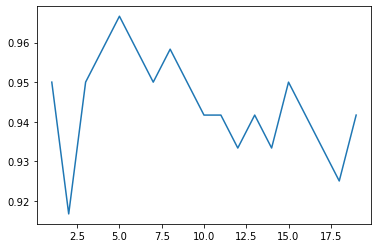

In [25]:
#We now perform 5-fold cross validation to find the optimal k
k_vals = np.arange(1, 20)
validation_error = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=5)
                for k in k_vals]
plt.plot(k_vals, [val.mean() for val in validation_error])

<ErrorbarContainer object of 3 artists>

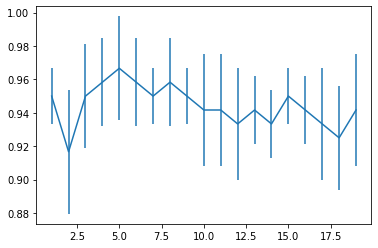

In [42]:
plt.errorbar(k_vals, [val.mean() for val in validation_error], yerr=[val.std() for val in validation_error])

We observe that our validation accuracy peaks at k=5, and steadily declines from there.

In [14]:
#Our test error is then
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

## Discussion

We shall answer the questions presented in the assignment sheet directly:    
\
   **How close to the reported accuracy do you expect its performance to be in reality, and what are the factors that might cause it to deviate?**   
   
\
   The difference between the our model's reported accuracy and its actual performance depends on a variety of factors. An important consideration is if our dataset is a representative sample of the underlying distribution. Our dataset is small, so there is a real danger that it is not. The choice of 5 folds, informed by our lack of data, means that our estimate of the test error will be less accurate due to the variation introduced by where we split the folds. Finally our low choice of k, although informed by the results from our CV, mean that our model skews in the variance direction of the bias-variance trade-off. Therefore, our model might overfit the data. This means that the reported accuracy will vary more with regard to the true accuracy compared to a model with greater k.  
 

# Conclusion

   Despite these sources of inaccuracy, our test accuracy was exceedingly high. Since our data has few dimensions and a direct relationship between the features and the outcome, a relatively simple model should fit it well. This gives us confidence that this model should perform well on new data not included in this dataset.